<a href="https://colab.research.google.com/github/Yashsharma009/new/blob/main/face-recognizition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless
!pip install cmake
!pip install dlib
!pip install face_recognition
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=d8cfc0c9165a60cd461d0904fad2bfa20dbab77157083022be75f8f46dfc3a4c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime


In [3]:

train_dir = '/content/drive/MyDrive/dataset/train_dire'
train_images = []
classNames = []
myList = os.listdir(train_dir)
for cl in myList:
    curImg = cv2.imread(os.path.join(train_dir, cl))
    train_images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

encodeListKnown = []
for img in train_images:
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeListKnown.append(encode)

print('Encoding Complete')


Encoding Complete


In [4]:
from google.colab.patches import cv2_imshow

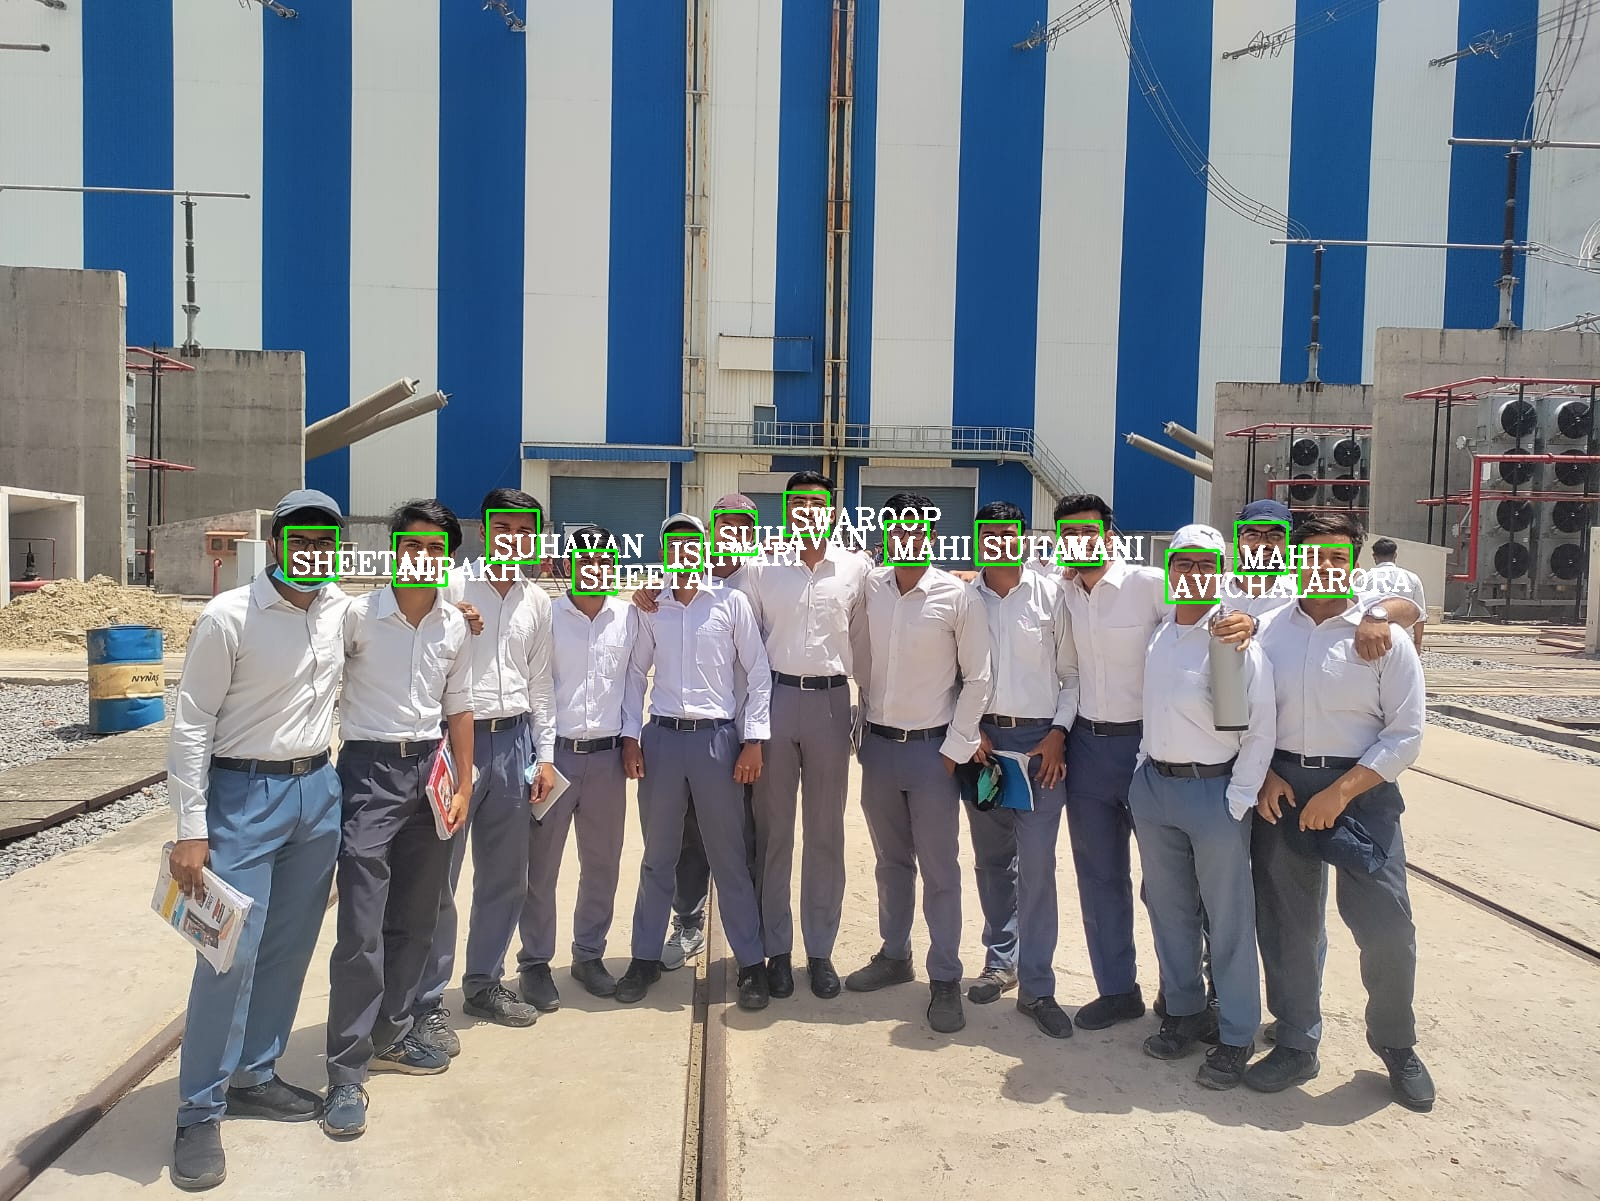

In [5]:
input_image_path = '/content/drive/MyDrive/dataset/test/test.jpeg'  # Update with the path to your input image
input_image = cv2.imread(input_image_path)
if input_image is not None:
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(input_image_rgb)
    encodings = face_recognition.face_encodings(input_image_rgb, face_locations)

    attendance_file = 'Attendance.csv'

    for face_encoding, face_location in zip(encodings, face_locations):
        matches = face_recognition.compare_faces(encodeListKnown, face_encoding)
        face_distances = face_recognition.face_distance(encodeListKnown, face_encoding)
        best_match_index = np.argmin(face_distances)

        if matches[best_match_index]:
            name = classNames[best_match_index].upper()
            top, right, bottom, left = face_location
            cv2.rectangle(input_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(input_image, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        else:
            # Keep the non-matching faces blank
            cv2.rectangle(input_image, (left, top), (right, bottom), (0, 0, 0), cv2.FILLED)

    with open(attendance_file, 'a+') as f:
        f.seek(0)
        myDataList = f.readlines()
        nameList = [line.split(',')[0].strip() for line in myDataList]

        for name in classNames:
            if name not in nameList:
                now = datetime.now()
                dtString = now.strftime('%H:%M:%S')
                f.write(f'{name},{dtString}\n')

    cv2_imshow(input_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the input image.")